#### Importing Libraries

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

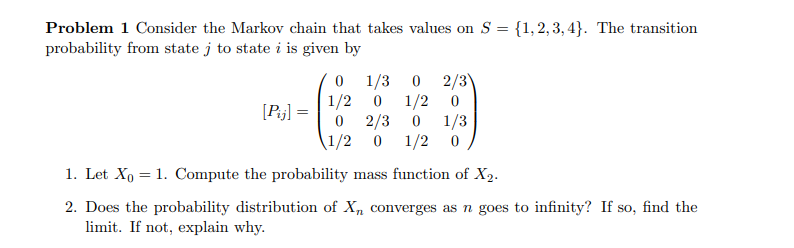

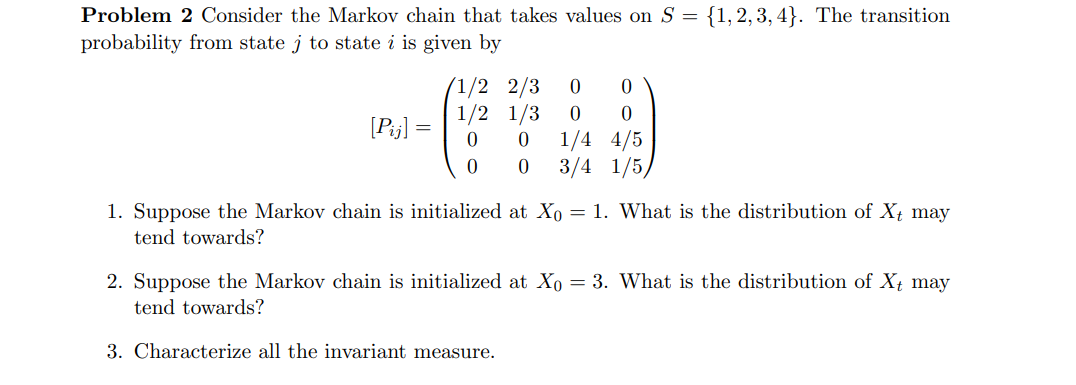

### Problem 2.1

In [3]:
# Given Transition Matrix
P = np.array([[1/2,2/3,0,0],[1/2,1/3,0,0],[0,0,1/4,4/5],[0,0,3/4,1/5]])
# P = np.array([[0,1/2,0,1/2],[1/3,0,2/3,0],[0,1/2,0,1/2],[2/3,0,1/3,0]])
x_0_1 = np.array([1,0,0,0])
x_0_3 = np.array([0,0,1,0])
x_2_1 = np.round(np.linalg.multi_dot([P,P,x_0_1]),3)
x_2_3 = np.round(np.linalg.multi_dot([P,P,x_0_3]),3)

In [4]:
print(f"Probability of being in State 1 after 2 transitions:{x_2_1[0]}")
print(f"Probability of being in State 2 after 2 transitions:{x_2_1[1]}")
print(f"Probability of being in State 3 after 2 transitions:{x_2_1[2]}")
print(f"Probability of being in State 4 after 2 transitions:{x_2_1[3]}")

Probability of being in State 1 after 2 transitions:0.5
Probability of being in State 2 after 2 transitions:0.0
Probability of being in State 3 after 2 transitions:0.5
Probability of being in State 4 after 2 transitions:0.0


- Since we can observe that even after 2 transitions, we stay in state 1 and 2 itself, if we begin in state 1.
- So if we do multiple transitions the probabilities will be there only for state 1 & 2 converging towards the stationary measure, given that we started in state 1 or state 2

### Problem 2.2

In [13]:
print(f"Probability of being in State 1 after 2 transitions:{x_2_3[0]}")
print(f"Probability of being in State 2 after 2 transitions:{x_2_3[1]}")
print(f"Probability of being in State 3 after 2 transitions:{x_2_3[2]}")
print(f"Probability of being in State 4 after 2 transitions:{x_2_3[3]}")

Probability of being in State 1 after 2 transitions:0.0
Probability of being in State 2 after 2 transitions:0.0
Probability of being in State 3 after 2 transitions:0.663
Probability of being in State 4 after 2 transitions:0.338


- Since we can observe that even after 2 transitions, we stay in state 3 and 4 itself, if we begin in state 1.
- So if we start in state 3 or 4, do multiple transitions the probabilities will be there only for state 3 & 4 converging towards the stationary measure

### Problem 2.3

In [7]:
# Finding the eigen values and eigen vectors for the matrix P
eigs, eigen=np.linalg.eig(P) #Every column is a eigen vector in eigen variable

# Getting the indices where eigen values are 1
inds = np.where(eigs == 1)[0].tolist()

# For a stochastic matrix, the invariant measure is the eigenvector corresponding to eigenvalue 1
inv_meas_1 = eigen[:,inds[0]]/(np.sum(eigen[:,inds[0]])) # Dividing it is necessary to have the probabilities sum up to 1
inv_meas_2 = eigen[:,inds[1]]/(np.sum(eigen[:,inds[1]])) # Dividing it is necessary to have the probabilities sum up to 1

# We have this eigen vector for the 1st eigen value 1
print(f"Invariant Measure for the given transition matrix for 1st eigen value {eigs[inds[0]]} is: {inv_meas_1}")
print(f"Invariant Measure for the given transition matrix for 2nd eigen value {eigs[inds[0]]} is: {inv_meas_2}")

TypeError: only size-1 arrays can be converted to Python scalars

#### Observation

- As there are 2 eigen values having value as 1, this means that there are 2 non-connected independent distributions which are aperiodic in themselves. And each of them will have their on stationary invariant measure which will be attained depending on the initial state.
- Like if we begin in the state 1 or 2, we will attain the 1st invariant measure, while if we begin in the 3rd or 4th state we will attain the other invariant measure

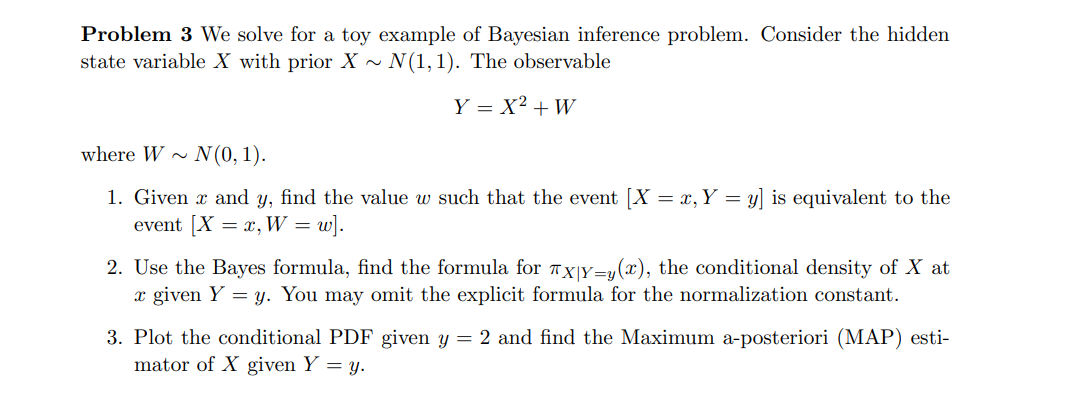

### Problem 3.2

- All the calculations are via ignoring the normalization constants $\frac{1}{sqrt(2\pi)}$


- We need to find the value for $\pi_{X|Y=y}(x) = \frac{\pi_{Y|X=x}(y) * \pi_{X}(x)}{\pi_{Y}(y)}$
- We have $\pi_{Y|X=x}(y)$ = $e^{\frac{-(y-x^2)^2}{2}}$ and $\pi_X(x) = e^{\frac{-(x-1)^2}{2}}$
- And in the denominator $\pi_{Y}(y) = X^2 + W $, by substituting the normal distribution of X and W we get
- $\pi_{Y}(y) = e^{\frac{(-x^2)}{2}} + e^{-(x-1)^2}$
- By substituting the distribution values we get finally
- $ \pi_{X|Y=y}(x) = \frac{e^{\frac{-(y-x^2)^2}{2}} + e^{\frac{-(x-1)^2}{2}}}{e^{\frac{(-x^2)}{2}} + e^{-(x-1)^2}} $

### Problem 3.3

- By substituting y = 2, we get the following plot for the conditional distribution of X wrt Y, where X is normally distributed with mean 1 and variance 1

In [8]:
x = 1 + 1 * np.random.randn(int(1e5))

In [9]:
y = (np.exp((-1 * (2 - x ** 2) ** 2)/2) + np.exp((-1 * (x - 1) ** 2)/2))

In [10]:
np.max(y)

1.9262993326121975

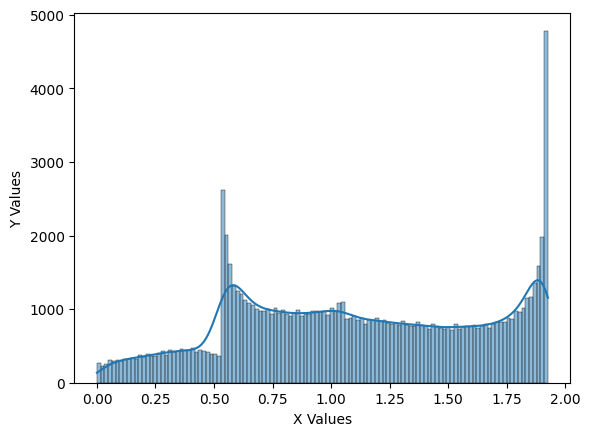

In [11]:
sns.histplot(data = y, bins = 120, kde = True)
plt.ylabel("Y Values")
plt.xlabel("X Values")
plt.show()

- How to get values of X` and how is it different from x